In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("ALL_CARS_DATA.csv")

In [4]:
df.head()

,CAR ID,PARENT COMPANY,MAKE ORIGIN,BRAND,MODEL/CLASS,CAR NAME,MODEL,CAR TYPE,IMAGE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW,DEALER NAME,DEALER LOCATION (CITY),DEALER LOCATION (STATE)
0,crossover1,General Motors,USA,Chevrolet,Traverse LT,Chevrolet Traverse LT,2024,crossover,https://www.cars.com/i/large/in/v2/fe8df1b1-43...,High,41170.0,0,New,0.0,4.0,992.0,Napleton Downtown Chevrolet Buick GMC,Chicago,Illinois
1,crossover2,General Motors,USA,Chevrolet,Traverse LT,Chevrolet Traverse LT,2024,crossover,https://www.cars.com/i/large/in/v2/110522e7-fa...,High,42540.0,0,New,0.0,4.6,470.0,Chevrolet of Homewood,Homewood,Illinois
2,crossover3,General Motors,USA,Chevrolet,Traverse LS,Chevrolet Traverse LS,2024,crossover,https://www.cars.com/i/large/in/v2/e1302f10-28...,High,37810.0,0,New,0.0,4.6,2514.0,Chevrolet of Naperville,Naperville,Illinois
3,crossover4,General Motors,USA,Chevrolet,Traverse 2LT,Chevrolet Traverse 2LT,2015,crossover,https://www.cars.com/i/large/in/v2/0d65dc66-cf...,Low,8995.0,9,Used,156612.0,4.9,713.0,Marquardt of Barrington Buick-GMC,Barrington,Illinois
4,crossover5,General Motors,USA,Chevrolet,Traverse 2LT,Chevrolet Traverse 2LT,2016,crossover,https://www.cars.com/i/large/in/v2/bc287cf4-30...,Low,12795.0,8,Used,95852.0,4.7,135.0,Jeff Perry Buick GMC,Peru,Illinois


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266847 entries, 0 to 266846
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CAR ID                   266847 non-null  object 
 1   PARENT COMPANY           266847 non-null  object 
 2   MAKE ORIGIN              266847 non-null  object 
 3   BRAND                    266847 non-null  object 
 4   MODEL/CLASS              266847 non-null  object 
 5   CAR NAME                 266847 non-null  object 
 6   MODEL                    266847 non-null  int64  
 7   CAR TYPE                 266847 non-null  object 
 8   IMAGE                    266847 non-null  object 
 9   PRICE RANGE              266846 non-null  object 
 10  PRICE($)                 266847 non-null  float64
 11  AGE OF CAR               266847 non-null  int64  
 12  STOCK TYPE               266847 non-null  object 
 13  MILEAGE                  266846 non-null  float64
 14  RATI

In [6]:
df["PRICE RANGE"].value_counts()

PRICE RANGE
Luxury    71038
High      66750
Medium    65784
Low       63274
Name: count, dtype: int64

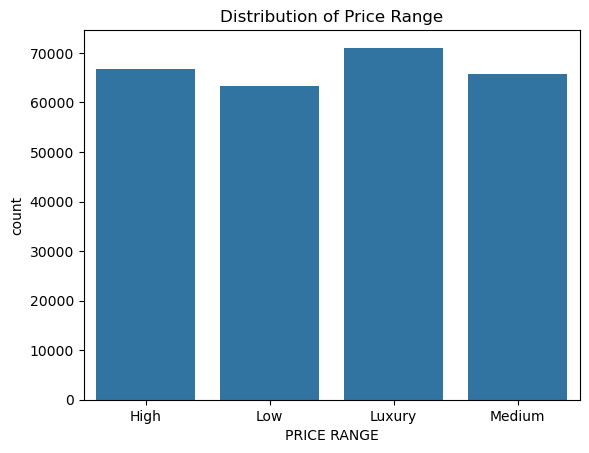

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price Range distribution
sns.countplot(x='PRICE RANGE', data=df)
plt.title('Distribution of Price Range')
plt.show()

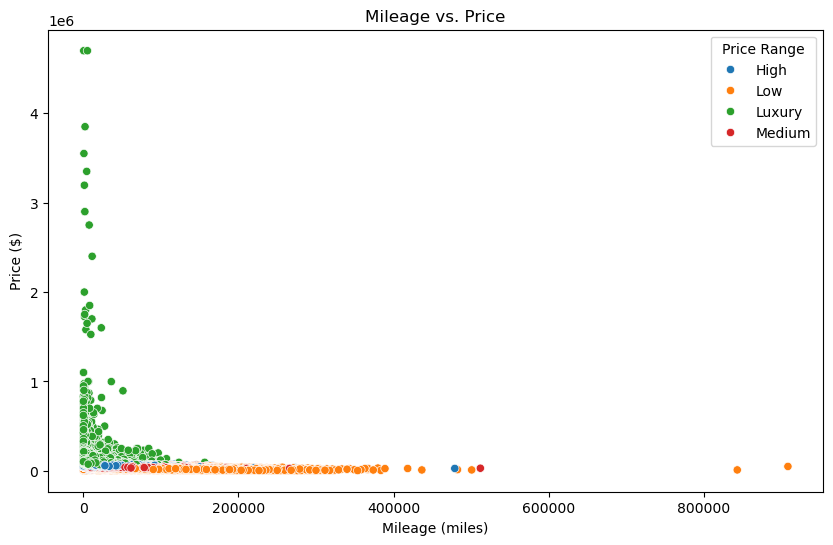

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MILEAGE', y='PRICE($)', hue='PRICE RANGE')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')
plt.legend(title='Price Range')
plt.show()


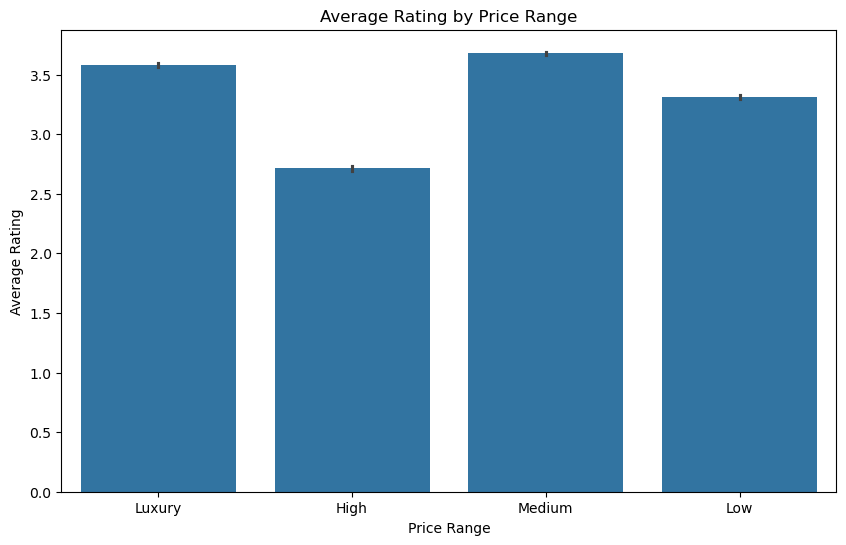

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PRICE RANGE', y='RATING')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Luxury','High', 'Medium', 'Low'])  # Adjust labels if needed
plt.show()


In [12]:
df.dtypes

CAR ID                      object
PARENT COMPANY              object
MAKE ORIGIN                 object
BRAND                       object
MODEL/CLASS                 object
CAR NAME                    object
MODEL                        int64
CAR TYPE                    object
IMAGE                       object
PRICE RANGE                 object
PRICE($)                   float64
AGE OF CAR                   int64
STOCK TYPE                  object
MILEAGE                    float64
RATING                     float64
REVIEW                     float64
DEALER NAME                 object
DEALER LOCATION (CITY)      object
DEALER LOCATION (STATE)     object
dtype: object

In [13]:
colmuns_to_remove = ["CAR ID", "IMAGE", "DEALER NAME", "PARENT COMPANY","DEALER LOCATION (STATE)","DEALER LOCATION (CITY)", "CAR NAME"]
df.drop(columns=colmuns_to_remove, axis=1, inplace=True)

In [14]:
df.head()

,MAKE ORIGIN,BRAND,MODEL/CLASS,MODEL,CAR TYPE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW
0,USA,Chevrolet,Traverse LT,2024,crossover,High,41170.0,0,New,0.0,4.0,992.0
1,USA,Chevrolet,Traverse LT,2024,crossover,High,42540.0,0,New,0.0,4.6,470.0
2,USA,Chevrolet,Traverse LS,2024,crossover,High,37810.0,0,New,0.0,4.6,2514.0
3,USA,Chevrolet,Traverse 2LT,2015,crossover,Low,8995.0,9,Used,156612.0,4.9,713.0
4,USA,Chevrolet,Traverse 2LT,2016,crossover,Low,12795.0,8,Used,95852.0,4.7,135.0


In [15]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'PRICE RANGE'
label_encoder = LabelEncoder()
df['PRICE RANGE'] = label_encoder.fit_transform(df['PRICE RANGE'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266847 entries, 0 to 266846
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MAKE ORIGIN  266847 non-null  object 
 1   BRAND        266847 non-null  object 
 2   MODEL/CLASS  266847 non-null  object 
 3   MODEL        266847 non-null  int64  
 4   CAR TYPE     266847 non-null  object 
 5   PRICE RANGE  266847 non-null  int64  
 6   PRICE($)     266847 non-null  float64
 7   AGE OF CAR   266847 non-null  int64  
 8   STOCK TYPE   266847 non-null  object 
 9   MILEAGE      266846 non-null  float64
 10  RATING       266847 non-null  float64
 11  REVIEW       266847 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 24.4+ MB


In [17]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'mileage' column
df['MILEAGE'] = imputer.fit_transform(df[['MILEAGE']])

In [18]:
df["AGE OF CAR"]= df["AGE OF CAR"].apply(lambda x: 0 if x < 0 else x)

df["REVIEW"]= df["REVIEW"].apply(lambda x: 0 if x < 0 else x)

df["RATING"]= df["RATING"].apply(lambda x: 0 if x < 0 else x)

In [106]:
import numpy as np

def plot_feature_importance(model, X_train, X_test, y_test, model_name, top_n=None):
    """
    Function to compute and plot feature importance for both tree-based models (Random Forest, Decision Tree)
    and permutation importance for model-agnostic methods (like KNN).

    Parameters:
    - model: Trained model (RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier).
    - X_train: Training data features (Pandas DataFrame).
    - X_test: Test data features (Pandas DataFrame).
    - y_test: Test data target (Pandas Series).
    - model_type: Type of model, "tree" for tree-based models (Random Forest, Decision Tree), 
                  "permutation" for KNN or any other model.
    - top_n: (Optional) Number of top features to display. If None, all features will be displayed.

    Returns:
    - Feature ranking and plot.
    """
    importances = model.feature_importances_
    feature_names = X_train.columns
    sorted_idx = np.argsort(importances)[::-1]

    # If top_n is specified, select the top N features
    if top_n:
        sorted_idx = sorted_idx[:top_n]

    # Print feature ranking
    print("Feature ranking:")
    for i, idx in enumerate(sorted_idx):
        print(f"{i + 1}. Feature: {feature_names[idx]} (Importance: {importances[idx]:.4f})")

    # Plot the feature importances
    plt.figure(figsize=(5, 3))
    plt.title(f"Feature Importance ({model_name})")
    plt.bar(range(len(sorted_idx)), importances[sorted_idx], align='center')
    plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
    plt.tight_layout()
    plt.show()

In [19]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
# Assuming 'df' is your dataset and 'PRICE RANGE' is the target column
# Categorical features to target encode
categorical_features = ['MAKE ORIGIN', 'BRAND', 'MODEL/CLASS', 'CAR TYPE', 'STOCK TYPE']

# Define the feature and target
X = df.drop(columns=['PRICE RANGE'])  # All features except target
y = df['PRICE RANGE']  # Target variable

# Split the data into training and test sets (important to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Target Encoder to categorical features
encoder = ce.TargetEncoder(cols=categorical_features)
X_train_encoded = encoder.fit_transform(X_train[categorical_features], y_train)
X_test_encoded = encoder.transform(X_test[categorical_features])

# Replace original categorical columns with the target-encoded ones
X_train.update(X_train_encoded)
X_test.update(X_test_encoded)


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example 1: Random Forest Classifier
model_rf = RandomForestClassifier()

# Perform 5-fold cross-validation on Random Forest
rf_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print(f"Random Forest Cross-validation Scores: {rf_scores}")
print(f"Random Forest Mean Accuracy: {rf_scores.mean():.2f}")

# Train and evaluate Random Forest on the train-test split
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on Test Set: {accuracy_rf:.2f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))




/home/jwan_mardini/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Cross-validation Scores: [0.9899288  0.98962432 0.98934301 0.98878089 0.98807823]
Random Forest Mean Accuracy: 0.99
Random Forest Accuracy on Test Set: 0.99
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13361
           1       1.00      1.00      1.00     12614
           2       0.99      0.99      0.99     14094
           3       0.99      0.99      0.99     13301

    accuracy                           0.99     53370
   macro avg       0.99      0.99      0.99     53370
weighted avg       0.99      0.99      0.99     53370

Random Forest Confusion Matrix:
[[13156     1   101   103]
 [    3 12558     0    53]
 [  123     0 13971     0]
 [   81    56     0 13164]]


Feature ranking:
1. Feature: PRICE($) (Importance: 0.4637)
2. Feature: CAR TYPE (Importance: 0.1255)
3. Feature: MODEL/CLASS (Importance: 0.1087)
4. Feature: BRAND (Importance: 0.0812)
5. Feature: MILEAGE (Importance: 0.0671)


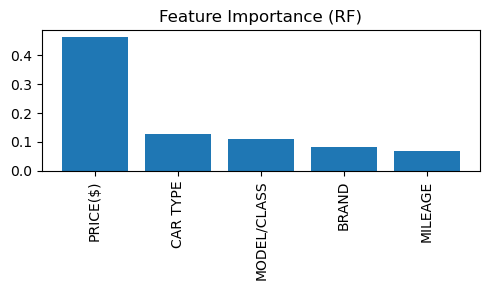

In [108]:
plot_feature_importance(model_rf, X_train, X_test, y_test, "RF", top_n=5)

In [74]:
# Example 2: Decision Tree Classifier
model_tree = DecisionTreeClassifier(criterion="entropy")

# Perform 5-fold cross-validation on Decision Tree
tree_scores = cross_val_score(model_tree, X_train, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print(f"Decision Tree Cross-validation Scores: {tree_scores}")
print(f"Decision Tree Mean Accuracy: {tree_scores.mean():.2f}")

# Train and evaluate Decision Tree on the train-test split
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy on Test Set: {accuracy_tree:.2f}")

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


/home/jwan_mardini/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Cross-validation Scores: [0.99367622 0.99393386 0.99379318 0.9932779  0.99320764]
Decision Tree Mean Accuracy: 0.99
Decision Tree Accuracy on Test Set: 0.99
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13361
           1       1.00      1.00      1.00     12614
           2       0.99      0.99      0.99     14094
           3       0.99      0.99      0.99     13301

    accuracy                           0.99     53370
   macro avg       0.99      0.99      0.99     53370
weighted avg       0.99      0.99      0.99     53370

Decision Tree Confusion Matrix:
[[13232     0    74    55]
 [    0 12587     1    26]
 [   91     0 14003     0]
 [   55    38     0 13208]]


Feature ranking:
1. Feature: PRICE($) (Importance: 0.5507)
2. Feature: CAR TYPE (Importance: 0.2952)
3. Feature: BRAND (Importance: 0.0793)
4. Feature: MODEL/CLASS (Importance: 0.0369)
5. Feature: MAKE ORIGIN (Importance: 0.0330)


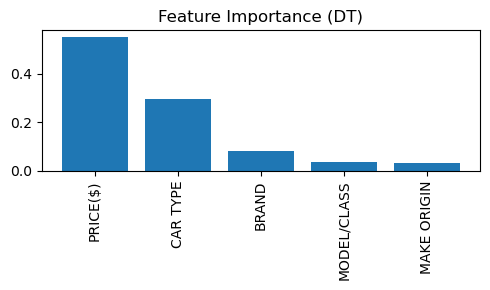

In [110]:
plot_feature_importance(model_tree, X_train, X_test, y_test, "DT", top_n=5)

In [80]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the 'n_neighbors' parameter

# Perform 5-fold cross-validation on KNN
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold and the mean accuracy
print(f"KNN Cross-validation Scores: {knn_scores}")
print(f"KNN Mean Accuracy: {knn_scores.mean():.2f}")

# Train and evaluate KNN on the train-test split
knn.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn.predict(X_test_scaled)

# Evaluate the scaled model
accuracy_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print(f"Scaled KNN Accuracy on Test Set: {accuracy_scaled:.2f}")

# Detailed classification report and confusion matrix
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_scaled))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_scaled))


/home/jwan_mardini/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Cross-validation Scores: [0.86659172 0.86710699 0.86457431 0.86761916 0.86321583]
KNN Mean Accuracy: 0.87
Scaled KNN Accuracy on Test Set: 0.87
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     13361
           1       0.89      0.90      0.89     12614
           2       0.94      0.93      0.93     14094
           3       0.82      0.82      0.82     13301

    accuracy                           0.87     53370
   macro avg       0.87      0.87      0.87     53370
weighted avg       0.87      0.87      0.87     53370

KNN Confusion Matrix:
[[11390   115   763  1093]
 [   62 11373     4  1175]
 [  938    35 13054    67]
 [ 1104  1313    37 10847]]


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],   # Different values for number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function (uniform or distance-based)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to try
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the fine-tuned KNN model
print("KNN Classification Report after Fine-Tuning:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix after Fine-Tuning:")
print(confusion_matrix(y_test, y_pred_knn))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/home/jwan_mardini/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNN Classification Report after Fine-Tuning:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     13361
           1       0.91      0.92      0.91     12614
           2       0.95      0.94      0.95     14094
           3       0.85      0.86      0.85     13301

    accuracy                           0.90     53370
   macro avg       0.90      0.90      0.90     53370
weighted avg       0.90      0.90      0.90     53370

KNN Confusion Matrix after Fine-Tuning:
[[11716    82   600   963]
 [   31 11591     1   991]
 [  733    30 13263    68]
 [  815  1063    25 11398]]
